In [11]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
datadir='/home/jovyan/psych60_jhub/ClassData'

#onsets = pd.read_excel('Onsets.xlsx')
#75*3*10 [75 questions, 3 runs, 10 subjects]

data = pd.read_csv('cleaned_behavioral.csv')
event_1 = pd.read_csv(os.path.join(datadir, "onsets1.csv"), sep=",")
event_2 = pd.read_csv(os.path.join(datadir, "onsets2.csv"), sep=",")
event_3 = pd.read_csv(os.path.join(datadir, "onsets3.csv"), sep=",")
a = event_1['trial_type']
b = event_2['trial_type']
c = event_3['trial_type']
events = pd.concat([a, b, c])

In [13]:
category = np.tile(events,10)
data['category'] = category 

In [14]:
response_data = data[['sID','question', 'category', 'order', 'response']]

#for subject 1, run1 
sub1_response_data = response_data[response_data['sID']==1548]
run1_response_data = sub1_response_data[sub1_response_data['order']==1] 
run1_response_data

#creating for loop
#subjects = []
#nrun =

,sID,question,category,order,response
0,1548,Walking around Occom Pond,Social,1,1
1,1548,Getting your dream job,Career,1,2
2,1548,Being rejected by your dream job,Career,1,4
3,1548,Summer Break,Event,1,1
4,1548,Interviewing for internships,Career,1,3
...,...,...,...,...,...
70,1548,Waiting at Murphy's to meet a friend who is late,Social,1,1
71,1548,Coming back from study abroad,School,1,1
72,1548,The first snowfall,Event,1,1
73,1548,A class you need to finish your major is full,School,1,3


In [15]:
df = run1_response_data[['response','category']]

In [16]:
social = df[df.category=='Social'].response.mean()
school = df[df.category=='School'].response.mean()
event = df[df.category=='Event'].response.mean()
career = df[df.category=='Career'].response.mean()

In [17]:
list_ = [career,school,social,event]

full = []
for idx,x in enumerate(list_):
    full.append([abs(x-y) for y in list_])
    
mat = np.array(full)

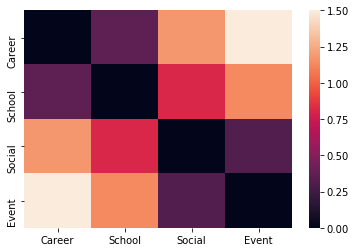

In [18]:
x_axis_labels = ['Career','School','Social', 'Event' ] # labels for x-axis
y_axis_labels = ['Career','School','Social', 'Event'] # labels for y-axis

sns.heatmap(mat, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

## For all subjects over all runs

In [19]:
response_data = data[['sID','question', 'category', 'order', 'response']]

In [20]:
response_data 

,sID,question,category,order,response
0,1548,Walking around Occom Pond,Social,1,1
1,1548,Getting your dream job,Career,1,2
2,1548,Being rejected by your dream job,Career,1,4
3,1548,Summer Break,Event,1,1
4,1548,Interviewing for internships,Career,1,3
...,...,...,...,...,...
2245,747,Studying in the library,School,3,0
2246,747,Winter Carnival,Event,3,0
2247,747,Homecoming,Event,3,0
2248,747,Getting a text from your ex,Social,3,0


In [21]:
df = response_data 
df = df[(df.response != 0)]
df

,sID,question,category,order,response
0,1548,Walking around Occom Pond,Social,1,1
1,1548,Getting your dream job,Career,1,2
2,1548,Being rejected by your dream job,Career,1,4
3,1548,Summer Break,Event,1,1
4,1548,Interviewing for internships,Career,1,3
...,...,...,...,...,...
1795,6,Studying in the library,School,3,2
1796,6,Winter Carnival,Event,3,2
1797,6,Homecoming,Event,3,2
1798,6,Getting a text from your ex,Social,3,3


In [22]:
print(df.shape)
print(response_data.shape)

(1473, 5)
(2250, 5)


In [30]:
75*10*3

2250

In [23]:
social = df[df.category=='Social'].response.mean()
school = df[df.category=='School'].response.mean()
event = df[df.category=='Event'].response.mean()
career = df[df.category=='Career'].response.mean()


In [24]:
list_ = [career,school,social,event]

full = []
for idx,x in enumerate(list_):
    full.append([abs(x-y) for y in list_])
    
mat = np.array(full)

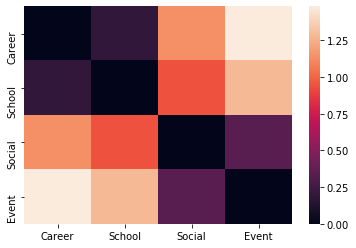

In [25]:
x_axis_labels = ['Career','School','Social', 'Event'] # labels for x-axis
y_axis_labels = ['Career','School','Social', 'Event'] # labels for y-axis

sns.heatmap(mat, xticklabels=x_axis_labels, yticklabels=y_axis_labels)


In [26]:
mat

array([[0.        , 0.19297315, 1.1375615 , 1.48188805],
       [0.19297315, 0.        , 0.94458835, 1.2889149 ],
       [1.1375615 , 0.94458835, 0.        , 0.34432655],
       [1.48188805, 1.2889149 , 0.34432655, 0.        ]])

## Comparison over 3 runs

## Run1 

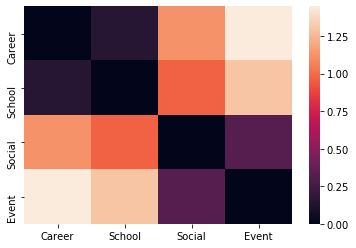

In [27]:
df_run1 = response_data[response_data['order']==1]

df_run1 = df_run1[(df_run1.response != 0)]

social = df_run1[df_run1.category=='Social'].response.mean()
school = df_run1[df_run1.category=='School'].response.mean()
event = df_run1[df_run1.category=='Event'].response.mean()
career = df_run1[df_run1.category=='Career'].response.mean()

list_ = [career,school,social,event]

full = []
for idx,x in enumerate(list_):
    full.append([abs(x-y) for y in list_])
    
mat = np.array(full)

x_axis_labels = ['Career','School','Social', 'Event'] # labels for x-axis
y_axis_labels = ['Career','School','Social', 'Event'] # labels for y-axis

sns.heatmap(mat, xticklabels=x_axis_labels, yticklabels=y_axis_labels)


In [ ]:
## R

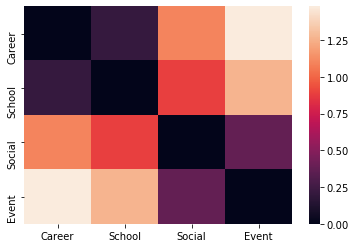

In [28]:
df_run2 = response_data[response_data['order']==2]

df_run2 = df_run2[(df_run2.response != 0)]

social = df_run2[df_run2.category=='Social'].response.mean()
school = df_run2[df_run2.category=='School'].response.mean()
event = df_run2[df_run2.category=='Event'].response.mean()
career = df_run2[df_run2.category=='Career'].response.mean()

list_ = [career,school,social,event]

full = []
for idx,x in enumerate(list_):
    full.append([abs(x-y) for y in list_])
    
mat = np.array(full)

x_axis_labels = ['Career','School','Social', 'Event'] # labels for x-axis
y_axis_labels = ['Career','School','Social', 'Event'] # labels for y-axis

sns.heatmap(mat, xticklabels=x_axis_labels, yticklabels=y_axis_labels)


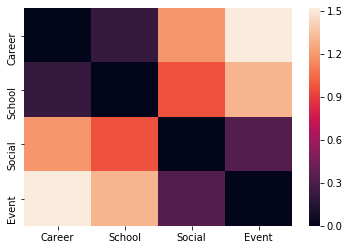

In [29]:
df_run3 = response_data[response_data['order']==3]

df_run3 = df_run3[(df_run3.response != 0)]

social = df_run3[df_run3.category=='Social'].response.mean()
school = df_run3[df_run3.category=='School'].response.mean()
event = df_run3[df_run3.category=='Event'].response.mean()
career = df_run3[df_run3.category=='Career'].response.mean()

list_ = [career,school,social,event]

full = []
for idx,x in enumerate(list_):
    full.append([abs(x-y) for y in list_])
    
mat = np.array(full)

x_axis_labels = ['Career','School','Social', 'Event'] # labels for x-axis
y_axis_labels = ['Career','School','Social', 'Event'] # labels for y-axis

sns.heatmap(mat, xticklabels=x_axis_labels, yticklabels=y_axis_labels)